## Exploratory Testing - Nathan Lock (2022-10-11)
**Is there a correlation between the year of release and sales?**

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Read the dataset from the csv file into a pandas dataframe object, select the relevant columns and drop any rows
which contain null values.

In [50]:
df = pd.read_csv("../bin/video_Games_Sales_as_at_22_Dec_2016.csv")
df = df[["Name", "Global_Sales", "Year_of_Release"]].dropna()
print(df.head())
print(f"Number of results: {len(df.index)}")

                       Name  Global_Sales  Year_of_Release
0                Wii Sports         82.53           2006.0
1         Super Mario Bros.         40.24           1985.0
2            Mario Kart Wii         35.52           2008.0
3         Wii Sports Resort         32.77           2009.0
4  Pokemon Red/Pokemon Blue         31.37           1996.0
Number of results: 16448


First the values are plotted onto a scatter graph to graphically view the results. Next, compute pairwise
correlation of global sales and year release to identify if there is a correlation between the two values. The result
from the function returns a value between 0 and 1. 1 means that there is a 1 to 1 relationship (a perfect correlation). A result of -0
.7 shows there is a reasonable correlation between the two values.

                 Global_Sales  Year_of_Release
Global_Sales          1.00000         -0.07634
Year_of_Release      -0.07634          1.00000


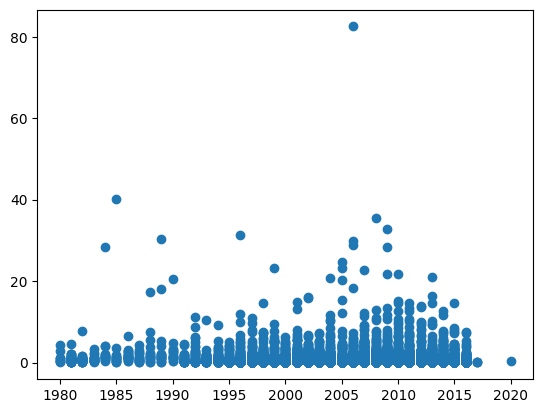

In [51]:
plt.scatter(df[["Year_of_Release"]], df[["Global_Sales"]])
print(df.corr(numeric_only=True))

As shown in the graph, there are clear outliers which do not fit with the curve which when removed can give a better
understanding of the graph's correlation.

In [57]:
z = np.abs(stats.zscore(df[["Year_of_Release", "Global_Sales"]]))
data_clean = df[(z<8).all(axis=1)]
data_clean.shape

(16409, 3)